# 1. Theory Questions

In [201]:
# 1 a
import numpy as np
X_1 = [[-2,1],[-5,-4],[-3,1],[0,3],[-8,11],[-2,5],[1,0],[5,-1],[-1,-3],[6,1]]
X_1 = np.asarray(X_1)
X_1_mean = np.mean(X_1,axis=0)
print(X_1_mean)
X_1_std = np.std(X_1,axis=0,ddof=1)
print(X_1_std)
X_1_S = (X_1-X_1_mean)/X_1_std
print(X_1_S)
cov = X_1_S.T@X_1_S/(len(X_1)-1)
cov

[-0.9  1.4]
[4.22821213 4.27395211]
[[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]
 [-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]]


array([[ 1.        , -0.40826218],
       [-0.40826218,  1.        ]])

In [216]:
eigv, eigvec = np.linalg.eig(cov)
eigv, eigvec

(array([1.40826218, 0.59173782]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [218]:
# 1 b
Z = X_1_S@eigvec[:,0]
Z

array([-0.11778069,  0.20774133, -0.2850161 , -0.11420117, -2.77564963,
       -0.77956329,  0.54937118,  1.38375847,  0.71123731,  1.22010258])

In [150]:
### 2
X_2_1 = X_1_S[0:5]
X_2_2 = X_1_S[5:]


mean_1 = np.mean(X_2_1,axis=0)
std_1 = np.std(X_2_1,axis=0,ddof=1)
mean_2 = np.mean(X_2_2,axis=0)
std_2 = np.std(X_2_2,axis=0,ddof=1)

# X_1_S_C = [[] for _ in range(len(X_1_S))]
# for ii,row in enumerate(X_1_S):
#     for x in row:
#         if x<0:
#             X_1_S_C[ii].append(0)
#         else:
#             X_1_S_C[ii].append(1)
# X_1_S_C

In [331]:
mean_1,std_1,mean_2,std_2

(array([-0.63856777,  0.23397548]),
 array([0.72124814, 1.27725755]),
 array([ 0.63856777, -0.23397548]),
 array([0.84283991, 0.69408344]))

In [149]:
import math
def HY(p,n):
    if p*n:
         return -p/(p+n)*math.log2(p/(p+n))-n/(p+n)*math.log2(n/(p+n))
    else:
         return 0

def EH(ps,ns):
    EH=0
    for i,p in enumerate(ps):
        EH += (p+ns[i])/(sum(ps)+sum(ns))*HY(p,ns[i])
    return EH

def IG(ps,ns):
    return HY(sum(ps),sum(ns)) - EH(ps,ns)

print(IG([4,2],[1,3]))
print(IG([3,4],[2,1]))

0.12451124978365313
0.034851554559677256


In [162]:
IG=[]
for i in range(X_1_S.shape[1]):
    var_i = X_1_S[:,i]
    # calculate the probalibility 
    P_1=[]
    P_2=[]   
    for var in var_i:
        P_1.append(1/std_1[i]*np.exp(-(var-mean_1[i])**2/2/std_1[i]*2))
        P_2.append(1/std_2[i]*np.exp(-(var-mean_2[i])**2/2/std_2[i]*2))
        
#     P_1 = P_1/np.sum(P_1)
#     P_2 = P_1/np.sum(P_2)

    # find the average entropy for that variable
    temp = 0
    for j in range(len(P_1)):
        temp += HY(P_1[j],P_2[j])
    IG.append(1-temp/len(var_i))
IG
        
                                

0
1


[0.4597911225630468, 0.1799812887165556]

In [156]:
range(X_1_S.shape[1])

range(0, 2)

Since class 1 and class 2 each have 5 samples, equally distributed. Therefore, the initial entropy is 1. Based on the calculation, variable 1 is more discriminating.  

In [332]:
# (c)
SW = np.outer(std_1,std_1) + np.outer(std_2,std_2)
print(SW)

SB = np.outer(mean_1-mean_2,mean_1-mean_2)
print(SB)

SWSB = np.linalg.inv(SW).dot(SB)
print(SWSB)

val,vec = np.linalg.eig(SWSB)
print(val)
print(vec)

[[1.230578   1.50622086]
 [1.50622086 2.11313869]]
[[ 1.6310752  -0.59763681]
 [-0.59763681  0.2189781 ]]
[[13.10556018 -4.80196445]
 [-9.62431152  3.52641177]]
[ 1.6631972e+01 -8.8817842e-16]
[[ 0.8060069   0.34403943]
 [-0.59190614  0.9389552 ]]


In [212]:
# d
Z = X_1_S.dot(np.transpose(vec[:,0]))
Z

array([-0.15429192, -0.03371212, -0.34491786, -0.05002309, -2.68296278,
       -0.70825801,  0.55607741,  1.45707269,  0.59030011,  1.37071558])

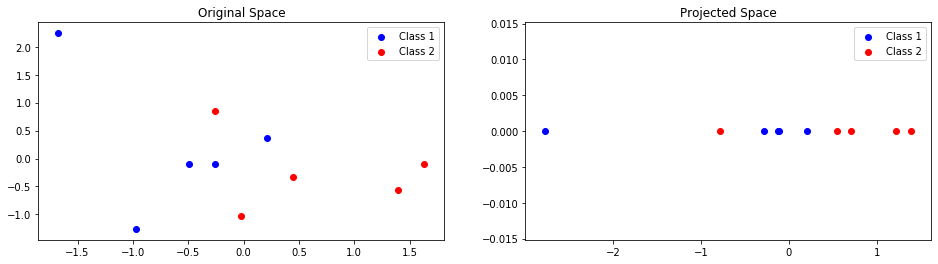

In [333]:
# e
import matplotlib.pyplot as plt
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)    
plt.scatter(X_1_S[:5,0],X_1_S[:5,1],c='b',label='Class 1')
plt.scatter(X_1_S[5:,0],X_1_S[5:,1],c='r',label='Class 2')
plt.legend()
plt.title('Original Space')

plt.subplot(1,2,2) 
plt.scatter(Z[:5],np.zeros_like(Z[:5]),c='b',label='Class 1')
plt.scatter(Z[5:],np.zeros_like(Z[5:]),c='r',label='Class 2')
plt.legend()
plt.title('Projected Space')
plt.savefig('HW3Q1-2.jpg')

# 2. Dimensionality Reduction via PCA

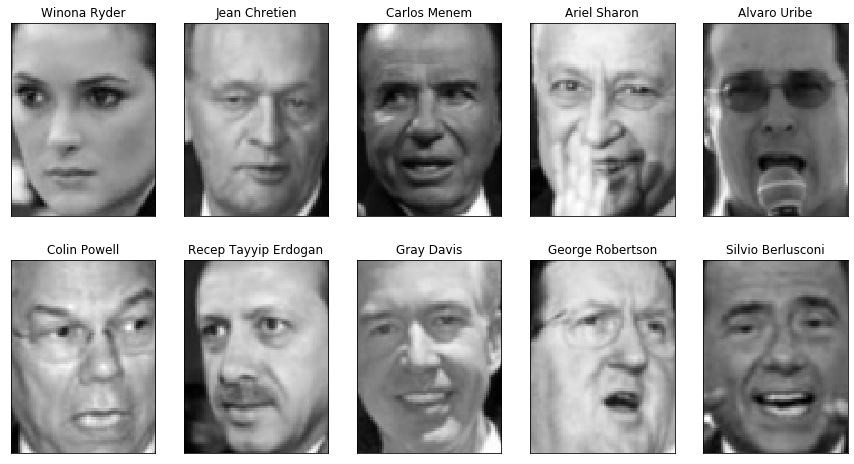

In [125]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw = {'xticks':(),'yticks':()})
for target, image, ax in zip(people.target,people.images, axes.ravel()):
    ax.imshow(image, cmap = cm.gray)
    ax.set_title(people.target_names[target])

In [2]:
print("people.images.shape:{}".format(people.images.shape))
print ("Number of classes: {}". format ( len ( people.target_names ) ) )

people.images.shape:(3023, 87, 65)
Number of classes: 62


In [3]:
# This dataset is skewed toward George W. Bush and Colin Powell as you can verify here
import numpy as np
# count how often each target appears
counts = np . bincount ( people.target )
# pr int count s next to t a r g e t names
for i , ( count , name ) in enumerate ( zip ( counts , people . target_names ) ) :
    print ("{0:25} {1:3} " . format (name , count ) , end=' ' )
    if ( i + 1) % 3 == 0 :
        print ( )

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [225]:
# take up to 50 images of each person to reduce the skewness
mask = np . zeros ( people . target . shape , dtype=np.bool )
for target in np.unique ( people . target ) :
    mask [ np . where ( people . target == target ) [ 0 ] [:50] ] = 1
X_people = people . data [mask ]
y_people = people . target [mask ]
# s c a l e the g r a y s c a l e va lue s to be between 0 and 1
# ins t e ad o f 0 and 255 f o r b e t t e r numeric s t a b i l i t y
X_people = X_people / 255

In [226]:
from sklearn . neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# s p l i t the data int o t r a i n i n g and t e s t s e t s
X_train , X_test , y_train , y_test = train_test_split(
    X_people , y_people , stratify=y_people , random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier( n_neighbors=1)
knn.fit ( X_train , y_train )
print (" Test set score of 1-nn : {:.2f} " . format ( knn . score( X_test , y_test) ) )

 Test set score of 1-nn : 0.23 


In [8]:
# 1
# compute accuracy of KNN-1
def KNN_1(x,x_train,y_train):
    dist_init = 10000
    idx=0
    for ii,x_t in enumerate(x_train):
        dist = np.sum((x-x_t)**2)
        if dist<dist_init:
            idx=ii
            dist_init = dist
    return  y_train[idx]  

def KNN_1_accuracy(x_test,y_test,x_train,y_train):
    n_acc = 0
    for ii,x_t in enumerate(x_test):
        y_predicted = KNN_1(x_t,x_train,y_train)
        if y_predicted==y_test[ii]:
            n_acc +=1
    return n_acc/len(y_test)    

In [9]:
# 2
KNN_1_accuracy(X_test,y_test,X_train,y_train)
# confirmed

0.23255813953488372

In [227]:
# 3
# standardize the train data and testing data
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0,ddof=1)
X_train_S = (X_train-mean)/std
X_test_S = (X_test-mean)/std

In [ ]:
# 4
# reduced the data to 100D using PCA
X_train_S_T = np.transpose(X_train_S)
Sigma = X_train_S_T.dot(X_train_S)/(len(X_train_S)-1)
val,vec = np.linalg.eig(Sigma)
val

In [231]:
# 5
def PCA(X,vectors,D):
#     X_T = np.transpose(X)
#     Sigma = X_T.dot(X)/(len(X)-1)
#     _,vec = np.linalg.eig(Sigma)
    return X.dot(vectors[:,:D])

D = 100
Z_train = PCA(X_train_S,vec,D)
Z_test = PCA(X_test_S,vec,D)
KNN_1_accuracy(Z_test,y_test,Z_train,y_train)

0.25387596899224807

In [232]:
knn.fit ( Z_train , y_train )
print (" Test set score of 1-nn : {:.2f} " . format ( knn . score( Z_test , y_test) ) )

 Test set score of 1-nn : 0.25 


In [259]:
# 6
def PCA_white(X,val,vectors,D):
    
    Diag_val = np.diag(1. / np.sqrt(abs(val)))
    W = vectors@Diag_val
    X_white = X.dot(W)
    return X_white[:,:D]


D = 100
Z_train_W = PCA_white(X_train_S,val,vec,D)
Z_test_W = PCA_white(X_test_S,val,vec,D)
KNN_1_accuracy(Z_test_W,y_test,Z_train_W,y_train)

0.3313953488372093

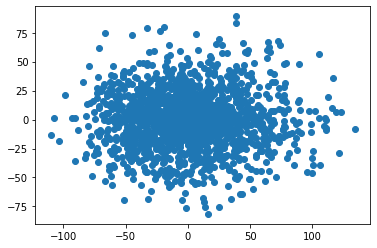

In [260]:
# 7 & 8
import matplotlib.pyplot as plt
D = 2
Z_train_2D = PCA(X_train_S,vec,D)
plt.scatter(Z_train_2D[:,0],Z_train_2D[:,1])
plt.savefig('HW3Q2.jpg')

# 3. Eigenfaces

In [335]:
# 1 2 3
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0,ddof=1)
X_train_S = (X_train-mean)/std
# reduced the data to 100D using PCA
X_train_S_T = np.transpose(X_train_S)
Sigma = X_train_S_T.dot(X_train_S)/(len(X_train_S)-1)
val,vec = np.linalg.eig(Sigma)


In [337]:
idx = np.argsort(val)[::-1]
val = val[idx]
vec = vec[:,idx]
val

array([ 1.5009663e+03,  6.2047748e+02,  4.3702176e+02, ...,
       -4.1589219e-06, -4.1621656e-06, -4.1776429e-06], dtype=float32)

In [338]:
Z_train_Q3 = PCA(X_train_S,vec,val.shape[0])

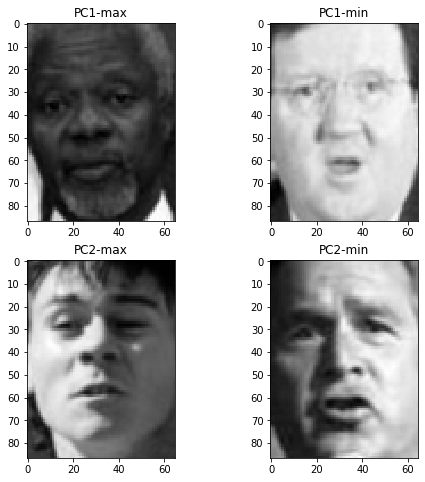

In [339]:
# 4
def plot_faces(idx,i):
    plt.subplot(2,2,i)
    plt.imshow(X_train[idx].reshape(87,65),cmap = cm.gray)

# first pricinpal axis
plt.figure(figsize = (8,8))
Z_train_1 = Z_train_Q3[:,0]
plot_faces(np.argmax(Z_train_1),1)
plt.title('PC1-max')
plot_faces(np.argmin(Z_train_1),2)
plt.title('PC1-min')

# second pricinpal axis
Z_train_2 = Z_train_Q3[:,1]
plot_faces(np.argmax(Z_train_2),3)
plt.title('PC2-max')
plot_faces(np.argmin(Z_train_2),4)
plt.title('PC2-min')
plt.savefig('HW3Q3-4.jpg')

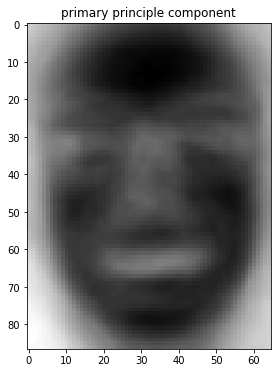

In [340]:
# 5
plt.figure(figsize = (6,6))
plt.imshow((vec[:,0]).reshape(87,65),cmap = cm.gray)
plt.title('primary principle component')
plt.savefig('HW3Q3-5.jpg')

In [319]:
Z_train_Q3[:,0].shape

(1547,)

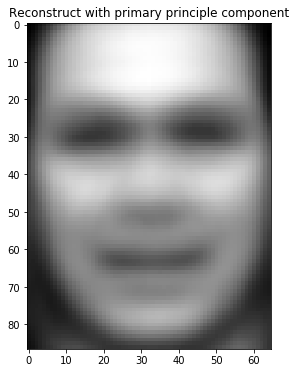

In [341]:
# 6
x_hat = Z_train_Q3[0,:]@vec[:,0].T
plt.figure(figsize = (6,6))
plt.imshow((x_hat*std+mean).reshape(87,65),cmap = cm.gray)
plt.title('Reconstruct with primary principle component')
plt.savefig('HW3Q3-6.jpg')

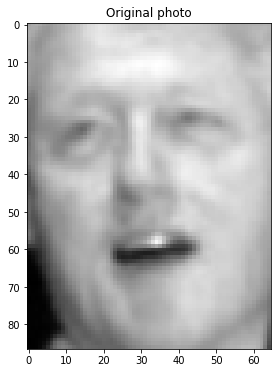

In [342]:
plt.figure(figsize = (6,6))
plt.imshow((X_train[0,:]).reshape(87,65),cmap = cm.gray)
plt.title('Original photo')
plt.savefig('HW3Q3-6-0.jpg')

In [301]:
# 7
def find_PCA_num(series,pec):
    sum_pec = 0
    sum_sum = 0
    sum_total = np.sum(series)
    i=0
    while sum_pec<pec:
        sum_sum += series[i]
        sum_pec = sum_sum/sum_total
        i +=1
    return i

print(val)
num_PCA = find_PCA_num(val,0.95)
num_PCA

[ 1.5009663e+03  6.2047748e+02  4.3702176e+02 ... -4.1589219e-06
 -4.1621656e-06 -4.1776429e-06]


189

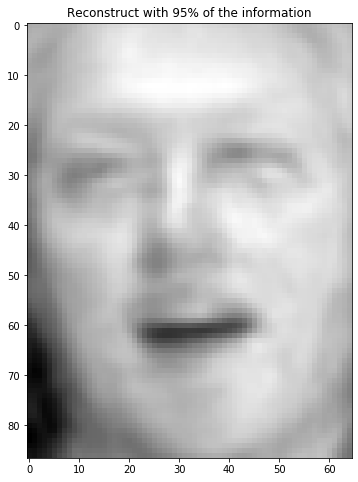

In [343]:
# 8
x_hat = Z_train_Q3[0,0:num_PCA] @vec[:,:num_PCA].T 
plt.figure(figsize = (8,8))
plt.imshow((x_hat*std+mean).reshape(87,65),cmap = cm.gray)
plt.title('Reconstruct with 95% of the information')
plt.savefig('HW3Q3-8.jpg')

In [324]:
Z_train_Q3[0:num_PCA,:].shape

(189, 5655)

# 4. Clutering

In [344]:
# 1 2 3
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0,ddof=1)
X_train_S = (X_train-mean)/std
# reduced the data to 100D using PCA
X_train_S_T = np.transpose(X_train_S)
Sigma = X_train_S_T.dot(X_train_S)/(len(X_train_S)-1)
val,vec = np.linalg.eig(Sigma)
idx = np.argsort(val)[::-1]
val = val[idx]
vec = vec[:,idx]
Z_train_Q4 = PCA(X_train_S,vec,100)

In [109]:
def center_update(X,X_init):
#     idices=[[]]*len(X_init)
    idices = [[] for _ in range(len(X_init))]
    for ii,x_item in enumerate(X):
        temp=[np.linalg.norm(x_item-xj) for xj in X_init]
#         for idx in idx_init:
#             temp.append(np.norm(X[:,ii]-X[:,idx]))
        idx_c = np.argmin(temp)
        idices[idx_c].append(ii)
    
    # calculate the new center
    X_center=[]
    for idx_j in idices:
        X_center.append(list(np.mean(X[idx_j,:],axis=0)))
    return np.asarray(X_center), np.asarray(idices)
 
def K_mean(X,X_init,tol):
    k=0
    center_p = X_init
    center_diff = np.sum(np.linalg.norm(X_init,ord=1,axis=1))    
    
    while k<10000 and center_diff>tol:
        center,cluster = center_update(X_train_S,X_init)        
        center_diff =  np.sum(np.linalg.norm(center-center_p,ord=1,axis=1))
        center_p = center
        k +=1
    
    return center,cluster

In [345]:
# 4
# prepare the data
import numpy as np
import random
np.random.seed(0)
np.random.shuffle(X_train_S)
k = 10
idx_init =  random.choices(list(range(len(X_train_S))), k=k)
X_init = X_train_S[idx_init,:]
# calculate K-means
center,cluster = K_mean(X_train_S,X_init,10**-23)

In [111]:
# 5 Print the number of images in each cluster
for item in cluster:
    print(len(item))

542
78
21
37
269
94
351
146
7
2


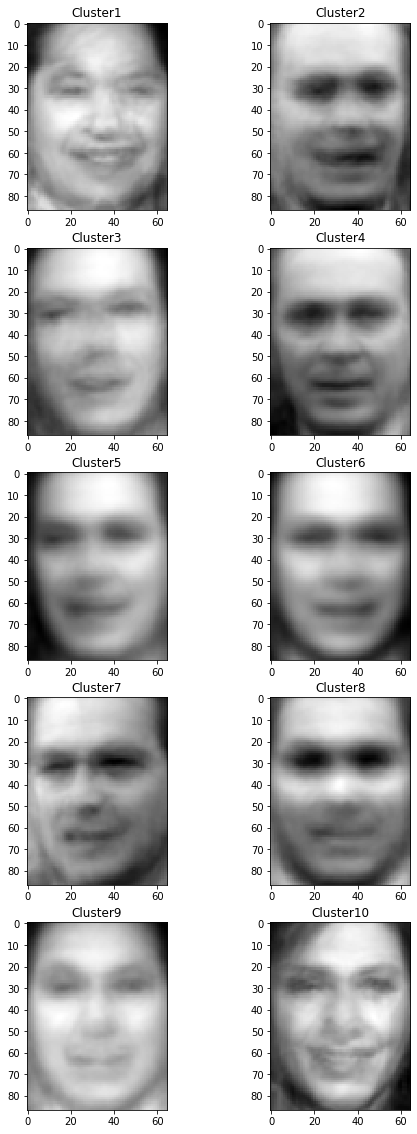

In [330]:
# 6
plt.figure(figsize = (8,20))
for i,item in enumerate(center):
    plt.subplot(5,2,i+1)    
    plt.imshow((item*std+mean).reshape(87,65),cmap = cm.gray)
    plt.title('Cluster'+str(i+1))
plt.savefig('HW3Q4-6.jpg')

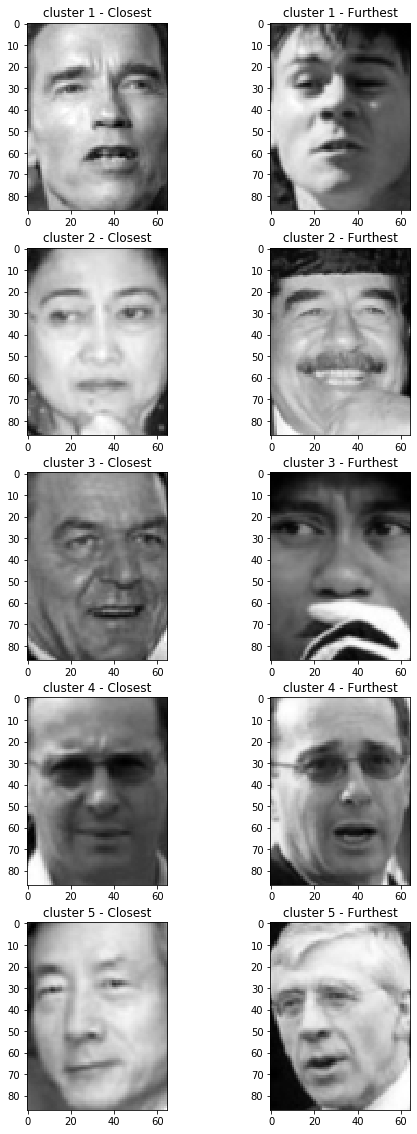

In [365]:
# 7
fig = plt.figure(figsize = (8,20))
for ii,item in enumerate(center):
    if ii<5:
    #     cluster_i = 'cluster '+str(ii)
        temp=[np.linalg.norm(item-xj) for xj in X_train_S[cluster[ii],:]]
        idx_min = np.argmin(temp)
        plt.subplot(5,2,2*ii+1)    
        plt.imshow((X_train_S[cluster[ii][idx_min],:]*std+mean).reshape(87,65),cmap = cm.gray)
        plt.title('cluster '+str(ii+1)+' - Closest')
        idx_max = np.argmax(temp)
        plt.subplot(5,2,2*ii+2)    
        plt.imshow((X_train_S[cluster[ii][idx_max],:]*std+mean).reshape(87,65),cmap = cm.gray)
        plt.title('cluster '+str(ii+1)+' - Furthest')
    #     fig.suptitle('Cluster figures')
    
fig.savefig('HW3Q4-7-1.jpg')

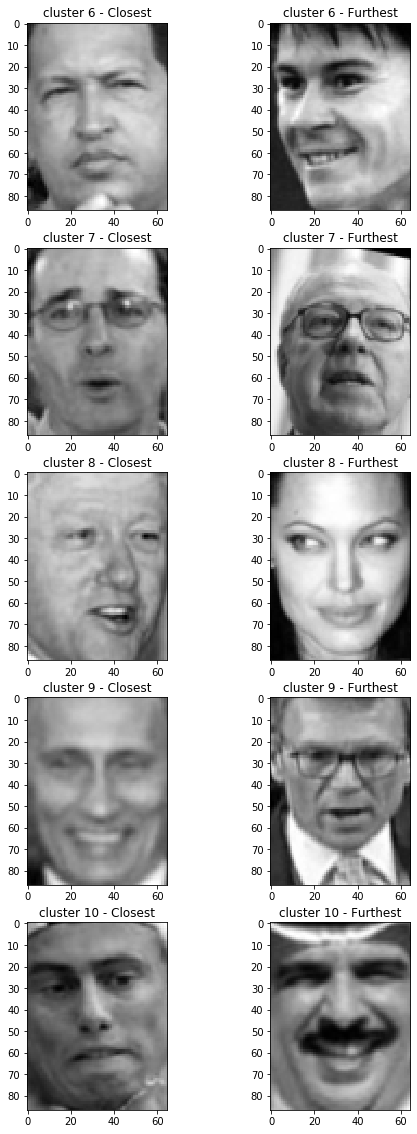

In [366]:
fig = plt.figure(figsize = (8,20))
for ii,item in enumerate(center):
    if ii>4:
    #     cluster_i = 'cluster '+str(ii)
        temp=[np.linalg.norm(item-xj) for xj in X_train_S[cluster[ii],:]]
        idx_min = np.argmin(temp)
        plt.subplot(5,2,2*ii-9)    
        plt.imshow((X_train_S[cluster[ii][idx_min],:]*std+mean).reshape(87,65),cmap = cm.gray)
        plt.title('cluster '+str(ii+1)+' - Closest')
        idx_max = np.argmax(temp)
        plt.subplot(5,2,2*ii-8)    
        plt.imshow((X_train_S[cluster[ii][idx_max],:]*std+mean).reshape(87,65),cmap = cm.gray)
        plt.title('cluster '+str(ii+1)+' - Furthest')
    #     fig.suptitle('Cluster figures')
    
fig.savefig('HW3Q4-7-2.jpg')